<a href="https://colab.research.google.com/github/j14sri/commit-classifier/blob/main/commit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhruvildave/github-commit-messages-dataset")

print("Path to dataset files:", path)

100%|██████████| 903M/903M [00:19<00:00, 48.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dhruvildave/github-commit-messages-dataset/versions/3


In [ ]:
path='/root/.cache/kagglehub/datasets/dhruvildave/github-commit-messages-dataset/versions/3'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score


In [ ]:
import os
directory_path='/root/.cache/kagglehub/datasets/dhruvildave/github-commit-messages-dataset/versions/3'
files=os.listdir(directory_path)
print(files)

['oneline.csv', 'full.csv']


In [ ]:
file_path='/root/.cache/kagglehub/datasets/dhruvildave/github-commit-messages-dataset/versions/3/full.csv'
df=pd.read_csv(file_path)
df.head(5)

,commit,author,date,message,repo
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,Mortada Mehyar <mortada@users.noreply.github.com>,Wed Apr 21 12:27:07 2021 +0800,DOC: add example for plotting asymmetrical err...,pandas-dev/pandas
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Patrick Hoefler <61934744+phofl@users.noreply....,Wed Apr 21 01:23:07 2021 +0200,Add keyword sort to pivot_table (#40954),pandas-dev/pandas
2,eaaefd140289a5103679ac6748567f724c7be56a,attack68 <24256554+attack68@users.noreply.gith...,Wed Apr 21 01:21:22 2021 +0200,ENH: `Styler.highlight_quantile` method (#40926),pandas-dev/pandas
3,aab87997058f3c74ba70286620ebe792ee4ef169,attack68 <24256554+attack68@users.noreply.gith...,Wed Apr 21 01:01:03 2021 +0200,ENH: add `decimal` and `thousands` args to `St...,pandas-dev/pandas
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,Simon Hawkins <simonjayhawkins@gmail.com>,Tue Apr 20 23:58:18 2021 +0100,[ArrowStringArray] Use utf8_upper and utf8_low...,pandas-dev/pandas


In [ ]:
df.dropna(subset=['message'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335969 entries, 0 to 4336298
Data columns (total 5 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   commit           object
 1   message          object
 2   cleaned_message  object
 3   category         int32 
 4   label            object
dtypes: int32(1), object(4)
memory usage: 181.9+ MB


In [ ]:
df.head(5)

,commit,message,cleaned_message,category,label
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,DOC: add example for plotting asymmetrical err...,doc add example for plotting asymmetrical erro...,1,Documentation and Feature Additions
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Add keyword sort to pivot_table (#40954),add keyword sort to pivot_table 40954,1,Documentation and Feature Additions
2,eaaefd140289a5103679ac6748567f724c7be56a,ENH: `Styler.highlight_quantile` method (#40926),enh styler highlight_quantile method 40926,1,Documentation and Feature Additions
3,aab87997058f3c74ba70286620ebe792ee4ef169,ENH: add `decimal` and `thousands` args to `St...,enh add decimal and thousands args to styler f...,1,Documentation and Feature Additions
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,[ArrowStringArray] Use utf8_upper and utf8_low...,arrowstringarray use utf8_upper and utf8_lowe...,1,Documentation and Feature Additions


In [ ]:
print(df.isnull().sum())

commit     0
author     0
date       0
message    0
repo       0
dtype: int64


In [ ]:
df.drop(['author','date','repo'], inplace=True,axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import re

# Example function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove non-word characters
    return text

# Preprocess the 'message' column
df['cleaned_message'] = df['message'].apply(preprocess_text)

# Vectorize the cleaned text
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_message'])  # Use cleaned text

# Apply K-Means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels
df['category'] = kmeans.labels_

# Inspect clusters
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df[df['category'] == cluster]['message'].head(10))

# Save categorized commits
df.to_csv('categorized_commits.csv', index=False)


Cluster 0:
54     ENH: [ArrowStringArray] Enable the string meth...
101    Two missing spaces in argmax, argmin docs (#40...
114               Subprocess to validate flake8 (#40812)
211    BUG: RollingGroupby no longer keeps the groupb...
233    PERF: increase the minimum number of elements ...
276    Revert "PERF: increase the minimum number of e...
284    PERF: increase the minimum number of elements ...
495    to_offset was not using the compiled regex (#4...
557    PERF: make DTA/TDA/PA _ndarray the attribute, ...
580    fix #39556 (infer_freq not working with freq="...
Name: message, dtype: object

Cluster 1:
0    DOC: add example for plotting asymmetrical err...
1             Add keyword sort to pivot_table (#40954)
2     ENH: `Styler.highlight_quantile` method (#40926)
3    ENH: add `decimal` and `thousands` args to `St...
4    [ArrowStringArray] Use utf8_upper and utf8_low...
5    BUG: groupby.rank with MaskedArray incorrect c...
6       DOC: more accurate wording in roadmap (

In [ ]:
cluster_labels = {
    0: 'Enhancement and Bug Fixes',
    1: 'Documentation and Feature Additions',
    2: 'Implementation and Reformatting',
    3: 'Regression and Cleanup',
    4: 'Dependency Management'
}

# Step 2: Map the cluster labels to the DataFrame
df['label'] = df['category'].map(cluster_labels)

# Display the DataFrame with labels
print(df)


                                           commit  \
0        692bba578efb5e305c9b116568e5aad75b3fdbb3   
1        855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f   
2        eaaefd140289a5103679ac6748567f724c7be56a   
3        aab87997058f3c74ba70286620ebe792ee4ef169   
4        9c43cd7675d96174051e470de1f45e2bf7c9ebdc   
...                                           ...   
4336294  43a17862477d0b2b7fb825ffd2a00ac193d2f771   
4336295  e3281e77cb1b684787971fef7985002583ec843a   
4336296  0a2f0cbc5c7ebc4573ba93c7b4c007efb1110856   
4336297  6f9e2ae3907632e2f7dbbabe8da403edd6dfa120   
4336298  8f35cc4768393b25468416829e980d7550619fb1   

                                                   message  \
0        DOC: add example for plotting asymmetrical err...   
1                 Add keyword sort to pivot_table (#40954)   
2         ENH: `Styler.highlight_quantile` method (#40926)   
3        ENH: add `decimal` and `thousands` args to `St...   
4        [ArrowStringArray] Use utf8_upper and utf8_l

In [ ]:
df.head(20)

,commit,message,cleaned_message,category,label
0,692bba578efb5e305c9b116568e5aad75b3fdbb3,DOC: add example for plotting asymmetrical err...,doc add example for plotting asymmetrical erro...,1,Documentation and Feature Additions
1,855696cde0ef5d80a7d4bd3f6a2940c5a2fecb3f,Add keyword sort to pivot_table (#40954),add keyword sort to pivot_table 40954,1,Documentation and Feature Additions
2,eaaefd140289a5103679ac6748567f724c7be56a,ENH: `Styler.highlight_quantile` method (#40926),enh styler highlight_quantile method 40926,1,Documentation and Feature Additions
3,aab87997058f3c74ba70286620ebe792ee4ef169,ENH: add `decimal` and `thousands` args to `St...,enh add decimal and thousands args to styler f...,1,Documentation and Feature Additions
4,9c43cd7675d96174051e470de1f45e2bf7c9ebdc,[ArrowStringArray] Use utf8_upper and utf8_low...,arrowstringarray use utf8_upper and utf8_lowe...,1,Documentation and Feature Additions
5,9e091427a26aa313bbcb8c46c5b434ce47775fe0,BUG: groupby.rank with MaskedArray incorrect c...,bug groupby rank with maskedarray incorrect ca...,1,Documentation and Feature Additions
6,1b95e1bdb566242b3ad1e19df7e9a5ff7dfc5f14,DOC: more accurate wording in roadmap (#41057),doc more accurate wording in roadmap 41057,1,Documentation and Feature Additions
7,9531e0915338528bf0852abfdc6d8a72b8de9396,REF: move only-used-once mixins to resample (#...,ref move only used once mixins to resample 41058,1,Documentation and Feature Additions
8,8b1430d4a885b235a66d600133a050d537608137,TST: Add test for union with duplicates (#40967),tst add test for union with duplicates 40967,1,Documentation and Feature Additions
9,95d2667dd88ba71593bcaa7dd2ad51f7e290325d,Clarify docs for MultiIndex drops and levels (...,clarify docs for multiindex drops and levels 4...,1,Documentation and Feature Additions


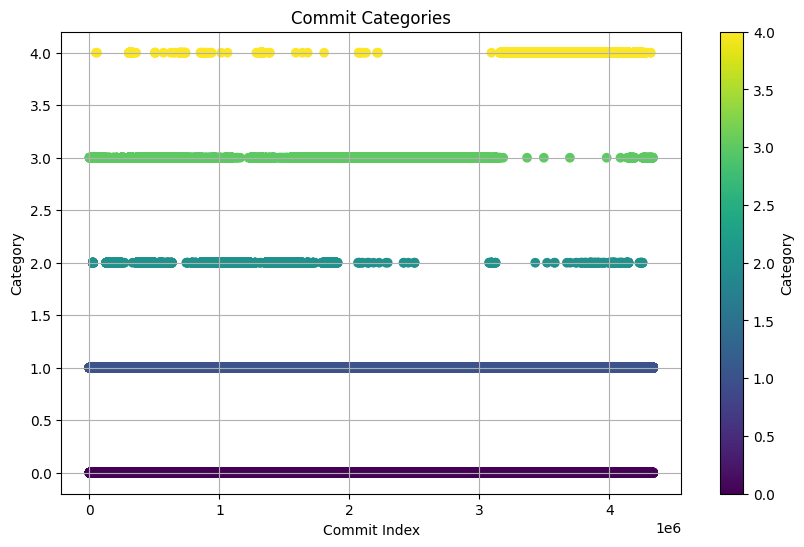


Cluster 0:
54     ENH: [ArrowStringArray] Enable the string meth...
101    Two missing spaces in argmax, argmin docs (#40...
114               Subprocess to validate flake8 (#40812)
211    BUG: RollingGroupby no longer keeps the groupb...
233    PERF: increase the minimum number of elements ...
276    Revert "PERF: increase the minimum number of e...
284    PERF: increase the minimum number of elements ...
495    to_offset was not using the compiled regex (#4...
557    PERF: make DTA/TDA/PA _ndarray the attribute, ...
580    fix #39556 (infer_freq not working with freq="...
Name: message, dtype: object

Cluster 1:
0    DOC: add example for plotting asymmetrical err...
1             Add keyword sort to pivot_table (#40954)
2     ENH: `Styler.highlight_quantile` method (#40926)
3    ENH: add `decimal` and `thousands` args to `St...
4    [ArrowStringArray] Use utf8_upper and utf8_low...
5    BUG: groupby.rank with MaskedArray incorrect c...
6       DOC: more accurate wording in roadmap (

In [ ]:

#Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['category'], c=df['category'], cmap='viridis', marker='o')
plt.title('Commit Categories')
plt.xlabel('Commit Index')
plt.ylabel('Category')
plt.colorbar(label='Category')
plt.grid()
plt.savefig('cluster_plot.png')
plt.show()

#Inspect clusters
for cluster in range(num_clusters):
    print(f"\nCluster {cluster}:")
    print(df[df['category'] == cluster]['message'].head(10))